In [2]:
import torch
import sklearn

from test import device

cuda
tensor([3, 4]) cpu
tensor([3, 4], device='cuda:0') cuda:0
tensor_7_7:tensor([[0.8752, 0.4953, 0.6319, 0.8094, 0.7739, 0.3848, 0.4653],
        [0.3675, 0.9804, 0.4850, 0.1385, 0.2659, 0.0230, 0.2502],
        [0.6735, 0.0697, 0.2806, 0.4398, 0.6434, 0.1514, 0.5338],
        [0.0092, 0.7106, 0.2605, 0.1415, 0.5352, 0.7553, 0.6370],
        [0.4220, 0.1864, 0.4861, 0.2522, 0.3083, 0.7639, 0.2601],
        [0.4617, 0.2628, 0.0567, 0.0791, 0.5781, 0.3917, 0.5599],
        [0.8214, 0.6501, 0.3093, 0.0371, 0.1654, 0.6035, 0.7166]])
tensor_1_7:tensor([[0.3194, 0.5416, 0.5898, 0.3259, 0.6351, 0.9569, 0.9589]])
tensor_mul:tensor([[2.4901],
        [1.4104],
        [1.6270],
        [2.2611],
        [1.7809],
        [1.6279],
        [2.1787]])
tensor_7_7:tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.419

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,  noise=0.03, random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples: {X[: 5]}")
print(f"First 5 smaples: {y[: 5]}")

First 5 samples: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 smaples: [1 1 1 1 0]


In [6]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

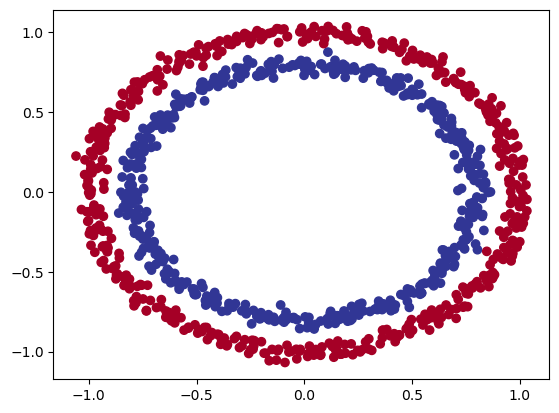

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
import torch 
torch.__version__

'2.4.0'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [13]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len( y_train)

(800, 800)

In [16]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [17]:
from sklearn import datasets

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self, x):
        return self.layer_2(self.layer_1(x))
    
model_0 = CircleModelV0().to(device)
model_0.parameters()

<generator object Module.parameters at 0x7f469161b920>

In [18]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.6661, -0.1387],
                      [-0.3396, -0.1886],
                      [-0.6247,  0.2838],
                      [-0.6339, -0.0451],
                      [ 0.2458, -0.2383]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.4012,  0.0892,  0.3887,  0.4537, -0.3122], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1625, -0.1935,  0.1402, -0.2337,  0.2069]], device='cuda:0')),
             ('layer_2.bias', tensor([0.0905], device='cuda:0'))])

In [19]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)


In [20]:
def accury_fn(y_ture, y_pred):
    correct =  torch.eq(y_ture, y_pred).sum().item()
    acc = (correct/len(y_ture)) * 100
    return acc

In [25]:
device

'cuda'

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accury_fn(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.no_grad():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accury_fn(y_test, test_pred)
        
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc:{acc:.2f} | Test loss:{test_loss:.5f}, Test acc:{test_acc:.2f}" )
    

Epoch:0 | Loss:0.69321, Acc:51.62 | Test loss:0.69449, Test acc:49.50
Epoch:10 | Loss:0.69317, Acc:51.88 | Test loss:0.69445, Test acc:48.50
Epoch:20 | Loss:0.69314, Acc:51.75 | Test loss:0.69441, Test acc:48.50
Epoch:30 | Loss:0.69312, Acc:51.38 | Test loss:0.69438, Test acc:48.00
Epoch:40 | Loss:0.69310, Acc:51.88 | Test loss:0.69435, Test acc:47.00
Epoch:50 | Loss:0.69308, Acc:51.75 | Test loss:0.69432, Test acc:47.50
Epoch:60 | Loss:0.69307, Acc:51.88 | Test loss:0.69431, Test acc:47.00
Epoch:70 | Loss:0.69306, Acc:51.50 | Test loss:0.69429, Test acc:48.00
Epoch:80 | Loss:0.69305, Acc:51.00 | Test loss:0.69428, Test acc:47.50
Epoch:90 | Loss:0.69304, Acc:50.62 | Test loss:0.69427, Test acc:47.00


In [50]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("helper_function.py file exists!")
else:
    print("Downloading helper_function.py file...!")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py", "wb") as f:
        f.write(request.content)

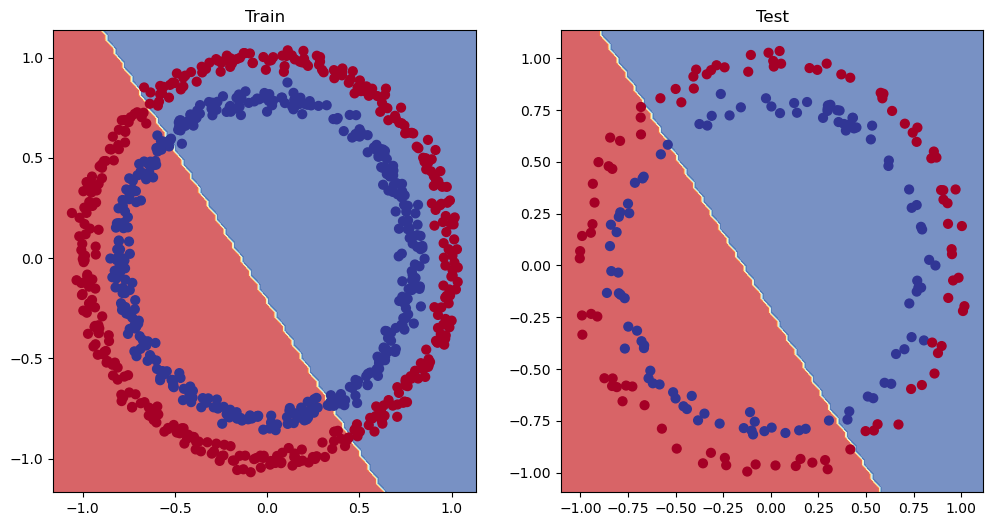

In [52]:
from helper_function import plot_predictions, plot_decision_boundary
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

In [ ]:
#Change model to unlinear

